## Script para gerar as listas dos sabores partilhados entre os ingredientes de cada receita válida
- Listar os ingredientes encontrados através de matching_flavorNetwork_ptDataset
- Eliminar da flavorNetwork(ingr_comp) os ingredientes que não fazem parte dessa lista
- Para cada um dos ingredientes listar os seus componentes de sabor (compound id)
- Para cada um dos ingredientes comparar a sua lista de componenenetes de sabor com a lista dos restantes ingredientes, ver se partilham e contar a ocorrencias
- Gerar uma lista para todos os pares de ingredientes e a quantidade de componenetes de sabor que partilham 
- Gerar uma lista para cada receita com todos os pares de ingredientes e a quantidade de componenetes de sabor que partilham

In [13]:
import pandas as pd
import itertools
import re
import numpy as np
import igraph as ig
from scipy.spatial.distance import squareform
from sortedcontainers import SortedDict
import statistics
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

#csv para dataframe
#limpar/apagar colunas/linhas indesejadas
#criação dos dataframe originais

matching_flavorNetwork_ptDataset_df = pd.read_csv("matching_flavorNetwork_ptDataset.csv")
matching_flavorNetwork_ptDataset_df = matching_flavorNetwork_ptDataset_df.drop(['ing_pt','ing_eng'], axis=1)
matching_flavorNetwork_ptDataset_df = matching_flavorNetwork_ptDataset_df[:-3]
flavor_network_ing_comp_df = pd.read_csv('flavor_network - ingr_comp.csv')

In [14]:
#colocar numa lista todos os ingredientes encontrados no dataframe matching_flavorNetwork_ptDataset_df

found_ingredients_list = []
for i,j in matching_flavorNetwork_ptDataset_df.iterrows():
    if j['id_flavorNetwork'] != "-":
        found_ingredients_list.append(int(j['id_flavorNetwork']))

In [15]:
#criar um novo dataframe (flavor_network_valid_ing_comp_df) só com os ingredientes encontrados 

flavor_network_valid_ing_comp_df = pd.DataFrame(columns = ['# ingredient id','compound id'])
index = 0
for i,j in flavor_network_ing_comp_df.iterrows():
    if j['# ingredient id'] in found_ingredients_list:
        flavor_network_valid_ing_comp_df.loc[index] = [j['# ingredient id'],j['compound id']]
        index += 1 

In [16]:
#criar um novo dataframe (flavor_network_valid_ing_list_comp_df) agrupando os ingredientes 

flavor_network_valid_ing_list_comp_df = flavor_network_valid_ing_comp_df.groupby('# ingredient id')['compound id'].apply(list).reset_index(name='list_comp')

In [17]:
flavor_network_valid_ing_list_comp_df

,# ingredient id,list_comp
0,3,"[272, 275, 423, 424, 282, 972, 978, 292, 714, ..."
1,7,"[273, 971, 348, 628, 767, 704, 79, 965, 361, 4..."
2,18,"[541, 72, 107, 195, 669, 871, 1064, 890, 568]"
3,19,"[272, 275, 284, 285, 568, 292, 837, 841, 1, 19..."
4,64,"[971, 1040, 647, 146, 704, 768, 1046, 567, 905..."
5,69,"[559, 827, 275, 278, 919, 610, 285, 631, 292, ..."
6,84,"[359, 91, 275, 280, 93, 282, 610, 631, 13, 292..."
7,94,"[68, 761, 345, 1040, 628, 424, 704, 705, 431, ..."
8,100,[1011]
9,105,"[761, 490, 764, 275, 424, 357, 358, 84, 772, 5..."


In [18]:
#criar um novo dataframe (flavor_network_pairwise_shared_flavors_df) comparando cada ingrediente com os outros todos e contar o número de componenetes de sabor que partilham 

flavor_network_pairwise_shared_flavors_df = pd.DataFrame(columns = ['ing 1','ing 2','shared_flavors'])
index = 0
for pair in itertools.combinations(flavor_network_valid_ing_list_comp_df['# ingredient id'], r=2):
    list1 = flavor_network_valid_ing_list_comp_df.loc[flavor_network_valid_ing_list_comp_df['# ingredient id'] == pair[0],'list_comp'].item()
    list2 = flavor_network_valid_ing_list_comp_df.loc[flavor_network_valid_ing_list_comp_df['# ingredient id'] == pair[1],'list_comp'].item()
    num_shared_flavors = len(set(list1).intersection(list2))
    flavor_network_pairwise_shared_flavors_df.loc[index] = [pair[0],pair[1],num_shared_flavors]
    index += 1

In [19]:
#carregar o csv com as receitas portuguesas

portuguese_dataset_valid_recipes_df = pd.read_csv("portuguese_dataset_valid_recipes.csv")
portuguese_dataset_valid_recipes_df = portuguese_dataset_valid_recipes_df.drop(['RECIPE (Portuguese)','RECIPE (English translation)','REF', 'PAGE'], axis=1)

## Função para gerar uma matriz com os sabores partilhados entre cada ingrediente de uma dada receita

In [61]:
def gerar_matriz_shared_ing(id_recipe):
    
    #Obter a coluna do csv das receitas portuguesas para uma dada receita
    pt_recipe_df = portuguese_dataset_valid_recipes_df.loc[portuguese_dataset_valid_recipes_df['CODE'] == id_recipe].reset_index(drop=True)
    
    #listar os ingredientes dessa receita com id pt
    ingredients_recipe_id_pt_list = []
    column_number = 0
    for column in pt_recipe_df.loc[0]:
        if (column == 1):
            ingredients_recipe_id_pt_list.append(re.sub(r'(?<=.{4}).+',"",pt_recipe_df.columns[column_number]))
        column_number += 1
    
    #Número de ingredientes por receita
    #num_ing_per_recipe.append(len(ingredients_recipe_id_pt_list))
    
    #listar os ingredientes dessa receita com id da flavor network
    ingredients_recipe_id_flavor_network_list = []
    for ing in ingredients_recipe_id_pt_list:
        for i,j in matching_flavorNetwork_ptDataset_df.iterrows():
            if(j['id_pt'] == ing):
                ingredients_recipe_id_flavor_network_list.append(int(j['id_flavorNetwork']))
    
    #eliminar ingredientes duplicados (ex: dois ingredientes no dataset portugues que correspondem ao mesmo ingrediente na flavor network)
    ingredients_recipe_id_flavor_network_list = list(dict.fromkeys(ingredients_recipe_id_flavor_network_list))
    
    #criar um dataframe para a receita com todos os pares de ingredientes e o número de componetes de sabor que partilham
    #criar um dataframe em forma de matrix
    appended_data = []
    D_pair_value = SortedDict()
    recipe_df = pd.DataFrame(columns = ['ing 1','ing 2','shared_flavors'])
    for pair in itertools.permutations(ingredients_recipe_id_flavor_network_list, r=2):
        data = flavor_network_pairwise_shared_flavors_df.loc[(flavor_network_pairwise_shared_flavors_df['ing 1'] == pair[0]) & (flavor_network_pairwise_shared_flavors_df['ing 2'] == pair[1])]
        appended_data.append(data)
        if (data['shared_flavors'].size):
            D_pair_value[pair] = data['shared_flavors'].values.item()
    
    recipe_sorted_matrix_df = pd.DataFrame(squareform(D_pair_value.values()), index=ingredients_recipe_id_flavor_network_list, columns=ingredients_recipe_id_flavor_network_list)
    
    
    #passar o dataframe para matriz numpy
    recipe_np = recipe_sorted_matrix_df.to_numpy()
    #return recipe_np, len(ingredients_recipe_id_pt_list),ingredients_recipe_id_pt_list
    
    
    return recipe_np,len(ingredients_recipe_id_flavor_network_list),ingredients_recipe_id_flavor_network_list,recipe_sorted_matrix_df

## Função para calcular food-pairing
- Média da matriz (só com valores > 0)

In [21]:
def food_pairing(matrix):
    
    #Passar a matriz para float
    recipe_nan_np = matrix.astype('float')
    
    #Substituir os zeros por nan
    recipe_nan_np[matrix == 0] = 'nan'
    
    #Calcular a média da matriz
    food_pairing = np.nanmean(recipe_nan_np)
    
    #Caso nenhum dos ingredientes partilhe componentes de sabor
    if (math.isnan(food_pairing)):
        food_pairing = 0
    return food_pairing

## Função para calcular food-bridging
- Normalizar os valores da matriz entre [0,1]
- Aplicar a fórmula 1/x -1, converte o grafo(matriz) num espaço de distância
- Aplicar Floyd-Warshall
- Dividir a matriz original pela matriz resultante da aplicação do Floyd-Warshall
- Substituir os nan por zero
- Calcular o número de valores da matriz (> 1 e < infinito)
- Calcular o número de valores da matriz (> 0 e < infinito)
- Dividir esses dois valores e o resultado é o valor de food-bridging

In [22]:
#Transformar uma matriz (numpy array) para um grafo
def matrix2graph(adj):
    g=ig.Graph.Weighted_Adjacency(np.ndarray.tolist(adj))
    return g

#Calcular o dijkstra, ou seja, o all pairs shortest paths num numpy array D no espaço das distancias
def all_pairs_sp(D):
    g = matrix2graph(D)
    DC = g.shortest_paths_dijkstra(weights=g.es['weight'], mode='OUT')
    DC = np.asarray(DC)
    return DC

In [23]:
def linear_norm(matrix):
    #Passar a matriz para float
    recipe_nan_np = matrix.astype('float')
    
    #Substituir os zeros por nan
    recipe_nan_np[matrix == 0] = 'nan'
    
    
    #Normalizar os valores da matriz entre [0,1]
    minval = np.nanmin(recipe_nan_np)
    maxval = np.nanmax(recipe_nan_np)
    recipe_normalized_nan_np = (((1-2*0.01)*recipe_nan_np + (2*0.01-1)*minval)/(maxval-minval))+0.01
    
    #Passar os nan para zero
    recipe_normalized_np = np.nan_to_num(recipe_normalized_nan_np)
    
    return recipe_normalized_np
    

In [25]:
def food_bridging(matrix):   
    
    
    
    #Passar a matriz para float
    recipe_nan_np = matrix.astype('float')
    
    #Substituir os zeros por nan
    recipe_nan_np[matrix == 0] = 'nan'
    
    
    #Normalizar os valores da matriz entre [0,1]
    minval = np.nanmin(recipe_nan_np)
    maxval = np.nanmax(recipe_nan_np)
    recipe_normalized_nan_np = (((1-2*0.01)*recipe_nan_np + (2*0.01-1)*minval)/(maxval-minval))+0.01
    
    #Passar os nan para zero
    recipe_normalized_np = np.nan_to_num(recipe_normalized_nan_np)
    
    #Aplicar a fórmula 1/x - 1
    recipe_normalized_form_np = (1/recipe_normalized_np) - 1
    
    #Renomear a matriz
    A = recipe_normalized_form_np
    
    #Aplicar Floyd-Warshall
    DC = all_pairs_sp(A)
    
    #Dividir a matriz original pela matriz resultante da aplicação do Floyd-Warshall
    s = np.divide(A,DC)
    
    #Calcular o número de valores da matriz (> 1 e < infinito)
    s1 = s[(s > 1) & (s < float('inf'))]
    
    #Calcular o número de valores da matriz (> 0 e < infinito)
    s2 = s[(s > 0) & (s < float('inf'))]
    
    #Dividir esses dois valores e o resultado é o valor de food-bridging
    
    #Caso nenhum dos ingredientes partilhe componentes de sabor
    try:
        SMP = s1.size/s2.size
    except ZeroDivisionError:
        SMP = 0
    SMP
    return SMP,s

## Pares semi-métricos

In [26]:
def semi_metric(A,source,target,ing_list,updated_df):
    
    #Passar a matriz de um grafo direto para um grafo não direto
    A = (A+np.transpose(A))/2.0
    
    C = linear_norm(A)

    #proximidade para distancia
    D = np.divide(1.0,C)-1.0

    #criar a matriz de adjacencia
    g = ig.Graph.Adjacency((D>0).tolist())
    
    for i in range(len(g.vs)):
        g.vs[i]["id"] = i
        g.vs[i]["label"] = str(i)

    g.es['weight'] = D[D.nonzero()]
    weight = g.es["weight"]
    g.es['label'] = weight
    
    source_ing = ing_list[source]
    target_ing = ing_list[target]
    
    
    # inf. são ingnorados
    if(updated_df.loc[source_ing,target_ing] > 1):
        semi_metric_list = g.get_shortest_paths(source,to = target, weights = weight)
        str1 = semi_metric_list[0]
    
        semi_metric_array = np.asarray(str1)
        str2 = ','.join(str(v) for v in semi_metric_array)
        super_semi_metric_array = np.asarray(str2.split(','))
        super_semi_metric_array = super_semi_metric_array.astype(int)
        
        new_array = []

        for i in range(len(super_semi_metric_array)):
            new_array.append(ing_list[super_semi_metric_array[i]])  
            
        return new_array

In [135]:
def generate_semi_metric_df(id_recipe):
    matrix, num_ing, ing_list,matrix_df = gerar_matriz_shared_ing(id_recipe)
    smp_value,matrix_s = food_bridging(matrix)
    updated_df = pd.DataFrame(matrix_s, index = matrix_df.index, columns = matrix_df.columns)
    semi_metric_recipe_df = pd.DataFrame(columns = ['ing 1','link1','link2','link3','link4','link5','ing2'])
    ing_combination_array = np.arange(num_ing) 
    result_array = []
    
    index = 0
    
    for pair in itertools.combinations(ing_combination_array, r=2): 
        result_array = semi_metric(matrix,pair[0],pair[1],ing_list,updated_df)
    
        if (result_array is not None and len(result_array) > 2):
            if(len(result_array) == 3):
                semi_metric_recipe_df.loc[index] = [result_array[0],result_array[1],'null','null','null','null',result_array[2]]
            elif(len(result_array) == 4):
                semi_metric_recipe_df.loc[index] = [result_array[0],result_array[1],result_array[2],'null','null','null',result_array[3]]
            elif(len(result_array) == 5):
                semi_metric_recipe_df.loc[index] = [result_array[0],result_array[1],result_array[2],result_array[3],'null','null',result_array[4]]
            elif(len(result_array) == 6):
                semi_metric_recipe_df.loc[index] = [result_array[0],result_array[1],result_array[2],result_array[3],result_array[4],'null',result_array[5]]
            elif(len(result_array) == 7):
                semi_metric_recipe_df.loc[index] = [result_array[0],result_array[1],result_array[2],result_array[3],result_array[4],result_array[5],result_array[6]]
            else:
                print("out of bounds -> ",len(result_array))

            index += 1
    
    return semi_metric_recipe_df

In [ ]:
semi_metric_df = pd.DataFrame(columns = ['ing 1','link1','link2','link3','link4','link5','ing2']) 
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    for i,recipe in portuguese_dataset_valid_recipes_df.iterrows():
        tmp_df = generate_semi_metric_df(recipe['CODE'])
        semi_metric_df = semi_metric_df.append(tmp_df,ignore_index = True,sort=False)
        

#semi_metric_df    
new_semi_metric_df = semi_metric_df.groupby(semi_metric_df.columns.tolist()).size().reset_index().rename(columns={0:'freq'})
new_semi_metric_df.sort_values(by = ['freq'],ascending=False).reset_index(drop=True)

semi_metric_df = pd.DataFrame(columns = ['ing 1','link1','link2','link3','link4','link5','ing2']) 
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    for i,recipe in portuguese_dataset_valid_recipes_df.iterrows():
        if (i < 24):
            tmp_df = generate_semi_metric_df(recipe['CODE'])
            semi_metric_df = semi_metric_df.append(tmp_df,ignore_index = True,sort=False)
        

#semi_metric_df    
new_semi_metric_df = semi_metric_df.groupby(semi_metric_df.columns.tolist()).size().reset_index().rename(columns={0:'freq'})
new_semi_metric_df.sort_values(by = ['freq'],ascending=False).reset_index(drop=True)

## Ordem das combinações

In [29]:
## Gerar a matriz completa
full_ing_list = list(dict.fromkeys(found_ingredients_list))
def gerar_matrix_completa():
    appended_data = []
    D_pair_value = SortedDict()
    for pair in itertools.permutations(full_ing_list, r=2):
        data = flavor_network_pairwise_shared_flavors_df.loc[(flavor_network_pairwise_shared_flavors_df['ing 1'] == pair[0]) & (flavor_network_pairwise_shared_flavors_df['ing 2'] == pair[1])]
        appended_data.append(data)
        if (data['shared_flavors'].size):
            D_pair_value[pair] = data['shared_flavors'].values.item()
    
    full_matrix_df = pd.DataFrame(squareform(D_pair_value.values()), index=full_ing_list, columns=full_ing_list)
    full_matrix = full_matrix_df.to_numpy()
    return full_matrix_df,full_matrix

In [30]:
A_df,A = gerar_matrix_completa()
B = A

In [31]:
#Passar a matriz de um grafo direto para um grafo não direto
B = (B+np.transpose(B))/2.0

In [32]:
def new_semi_metric(C,D,source,target):
    
    
    g = ig.Graph.Adjacency((D>0).tolist())
    
    #g.to_undirected()

    for i in range(len(g.vs)):
        g.vs[i]["id"] = i
        g.vs[i]["label"] = str(i)

    g.es['weight'] = D[D.nonzero()]
    weight = g.es["weight"]
    g.es['label'] = weight
    
    semi_metric_list = g.get_all_shortest_paths(source,target, weights = weight)
    str1 = semi_metric_list[0]

    semi_metric_array = np.asarray(str1)
    str2 = ','.join(str(v) for v in semi_metric_array)
    super_semi_metric_array = np.asarray(str2.split(','))
    super_semi_metric_array = super_semi_metric_array.astype(int)
    
    final = 0
        
    for i in range(len(super_semi_metric_array)-1):
        value = B[super_semi_metric_array[i],super_semi_metric_array[i+1]]
        final += value
            
    print("-> ",final)
            
   
    new_array = []

    for i in range(len(super_semi_metric_array)):
        new_array.append(full_ing_list[super_semi_metric_array[i]]) 

    return new_array,super_semi_metric_array

In [33]:
def funcHelp(array):
    
    #Normalizar entre [0,1]
    C = linear_norm(B)
    
    #Proximidade para distancia
    D = np.divide(1.0,C)-1.0
    
    if (len(array) == 3):
        print(new_semi_metric(C,D,array[0],array[2]))
        print(B[array[0],array[1]] + B[array[1],array[2]])
        
    elif(len(array) == 4):
        print(new_semi_metric(C,D,array[0],array[3]))
        print(B[array[0],array[1]] + B[array[1],array[2]] + B[array[2],array[3]])
    
    elif(len(array) == 5):
        print(new_semi_metric(C,D,array[0],array[4]))
        print(B[array[0],array[1]] + B[array[1],array[2]] + B[array[2],array[3]] + B[array[3],array[4]])
        

In [34]:
arrayx = [24,152,138,106]
funcHelp(arrayx)

->  9.0
([1086, 1060, 860], array([ 24, 135, 106]))
0.0


/home/ricardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


## Calular média food-pairing, média food-bridging e média de ingredientes por receita Portugal

In [35]:
values_food_pairing = []
values_food_bridging = []
num_ing_per_recipe = []
#return recipe_np, len(ingredients_recipe_id_flavor_network_list),ingredients_recipe_id_flavor_network_list,recipe_sorted_matrix_df

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    for i,recipe in portuguese_dataset_valid_recipes_df.iterrows():
        #matrix, num_ing, ing_list = gerar_matriz_shared_ing(recipe['CODE'])
        matrix,num_ing,ing_list,matrix2 = gerar_matriz_shared_ing(recipe['CODE'])
        values_food_pairing.append(food_pairing(matrix))
        values_food_bridging.append(food_bridging(matrix)[0])
        num_ing_per_recipe.append(num_ing)
    

avg_food_pairing_portugal = statistics.mean(values_food_pairing)
avg_food_bridging_portugal = statistics.mean(values_food_bridging)
avg_number_ing_per_recipe_portugal = statistics.mean(num_ing_per_recipe)

print("Average food-pairing Portugal: ",avg_food_pairing_portugal)
print("Average food-bridging Portugal: ",avg_food_bridging_portugal)
print("Average number of ingredients Portugal: ",avg_number_ing_per_recipe_portugal)

Average food-pairing Portugal:  11.124818519714928
Average food-bridging Portugal:  0.4879827148495105
Average number of ingredients Portugal:  7.878787878787879


## Adicionar valores para as restantes regiões do Mundo

In [36]:
avg_food_pairing_world = [12.4677,12.2840,20.8037,19.6012,12.7788,23.0938,19.0830,13.6524,13.8606,19.2004,21.1084]
avg_food_bridging_world = [0.4244,0.3854,0.3888,0.4385,0.3467,0.3776,0.3387,0.4478,0.4780,0.4079,0.3766]
avg_number_ing_per_recipe_world = [10.4517,8.9562,8.3885,9.3795,8.3891,7.9621,6.8240,10.2866,11.3173,8.8608,8.0259]
labels_countries = ['African','East Asian','Eastern European','Latin American','Middle Eastern','North American','Northern European','South Asian','Southeast Asian','Southern European','Western European']

class world_region:
    def __init__(self,name_region,avg_food_pairing,avg_food_bridging):
        self.name_region = name_region
        self.avg_food_pairing = avg_food_pairing
        self.avg_food_bridging = avg_food_bridging

regions_objects_world_by_index = []

Portugal = world_region('Portugal',avg_food_pairing_portugal,avg_food_bridging_portugal)
regions_objects_world_by_index.append(Portugal)

for i in range(11):
    region_name = labels_countries[i]
    region_name = world_region(region_name,avg_food_pairing_world[i],avg_food_bridging_world[i])
    regions_objects_world_by_index.append(region_name)


## Figuras (Comparar Portugal com as outra regiões do Mundo)

### Food-Pairing versus Food-Bridging

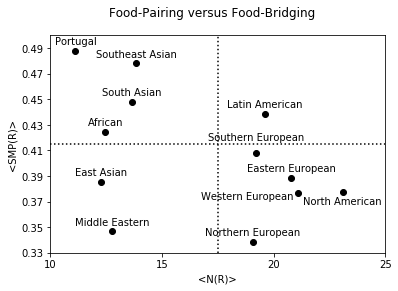

In [44]:
fig, axs = plt.subplots()
plt.xlim([10, 25])
plt.ylim([0.33, 0.5])
axs.scatter(avg_food_pairing_portugal,avg_food_bridging_portugal,c='black')
for i in range(11):
    axs.scatter(avg_food_pairing_world[i],avg_food_bridging_world[i],c='black')
    if(labels_countries[i] == 'North American'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]-0.010],ha='center')
    elif(labels_countries[i] == 'Southern European'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]+0.010],ha='center')
    elif(labels_countries[i] == 'Western European'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i]-2.3,avg_food_bridging_world[i]-0.005],ha='center')
    else:
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]+0.005],ha='center')

axs.set_xticks(np.arange(10, 30, 5))
axs.set_yticks(np.arange(0.33, 0.5, 0.02))
axs.set_xlabel('<N(R)>')
axs.set_ylabel('<SMP(R)>')
ynew = 0.415
axs.axhline(ynew, ls = 'dotted', color = 'black')
xnew = 17.5
axs.axvline(xnew, ls = 'dotted', color = 'black')
axs.annotate('Portugal',[avg_food_pairing_portugal,avg_food_bridging_portugal+0.005],ha='center')
fig.suptitle('Food-Pairing versus Food-Bridging')
#fig.savefig('food_pairing_vs_food_bridging_world',dpi=300)

### Average Food-Pairing x Average Number of Ingredients

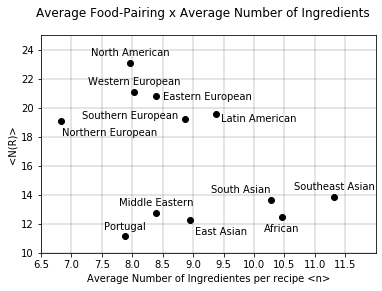

In [45]:
fig, axs = plt.subplots()
plt.xlim([6.5, 12])
plt.ylim([10, 25])
for i in range(11):
    axs.scatter(avg_number_ing_per_recipe_world[i],avg_food_pairing_world[i],c='black')
    if(labels_countries[i] == 'Northern European'):
         axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]+0.8,avg_food_pairing_world[i]-1],ha='center')
    elif(labels_countries[i] == 'East Asian'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]+0.5,avg_food_pairing_world[i]-1],ha='center')
    elif(labels_countries[i] == 'African'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i],avg_food_pairing_world[i]-1],ha='center')
    elif(labels_countries[i] == 'South Asian'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]-0.5,avg_food_pairing_world[i]+0.5],ha='center')
    elif(labels_countries[i] =='Latin American'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]+0.7,avg_food_pairing_world[i]-0.5],ha='center')
    elif(labels_countries[i] =='Southern European'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]-0.9,avg_food_pairing_world[i]+0.1],ha='center')
    elif(labels_countries[i] =='Eastern European'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]+0.85,avg_food_pairing_world[i]-0.2],ha='center')
    else:
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i],avg_food_pairing_world[i]+0.5],ha='center')

        
axs.scatter(avg_number_ing_per_recipe_portugal,avg_food_pairing_portugal,c='black')
axs.annotate('Portugal',[avg_number_ing_per_recipe_portugal,avg_food_pairing_portugal+0.5],ha='center')
axs.set_xticks(np.arange(6.5, 12, 0.5))
axs.set_yticks(np.arange(10, 25, 2))
axs.set_xlabel('Average Number of Ingredientes per recipe <n>')
axs.set_ylabel('<N(R)>')
plt.grid(color = 'black',linewidth=0.2)
fig.suptitle('Average Food-Pairing x Average Number of Ingredients')
#fig.savefig('average_food_pairing_vs_average_number_ingredients_world',dpi=300)

### Average Food-Bridging x Average Number of Ingredients

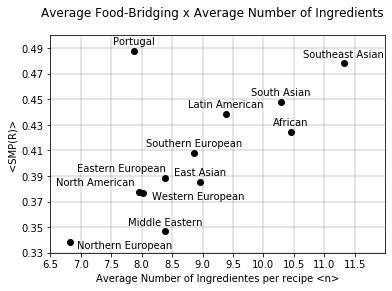

In [46]:
fig, axs = plt.subplots()
plt.xlim([6.5, 12])
plt.ylim([0.33, 0.5])
axs.scatter(avg_number_ing_per_recipe_portugal,avg_food_bridging_portugal,c='black')
axs.annotate('Portugal',[avg_number_ing_per_recipe_portugal,avg_food_bridging_portugal+.005],ha="center")
for i in range(11):
    axs.scatter(avg_number_ing_per_recipe_world[i],avg_food_bridging_world[i],c='black')
    if(labels_countries[i] == 'Northern European' or labels_countries[i] == 'Western European'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]+0.9,avg_food_bridging_world[i]-.005],ha='center')
    elif(labels_countries[i] == 'North American' or labels_countries[i] == 'Eastern European'):
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i]-0.72,avg_food_bridging_world[i]+.005],ha='center')
    else:
        axs.annotate(labels_countries[i],[avg_number_ing_per_recipe_world[i],avg_food_bridging_world[i]+.005],ha='center')
    
axs.set_xticks(np.arange(6.5, 12, 0.5))
axs.set_yticks(np.arange(0.33, 0.5, 0.02))
axs.set_xlabel('Average Number of Ingredientes per recipe <n>')
axs.set_ylabel('<SMP(R)>')
plt.grid(color = 'black',linewidth=0.2)
fig.suptitle('Average Food-Bridging x Average Number of Ingredients')
#fig.savefig('average_food_bridging_vs_average_number_ingredients_world',dpi=300)

### Average Food-Pairing

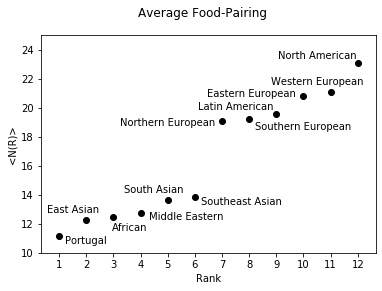

In [47]:
sorted_regions_world_by_avg_food_pairing_by_index = sorted(regions_objects_world_by_index,key=lambda x: x.avg_food_pairing)
fig,axs = plt.subplots()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylim([10, 25])
for i in range(12):
    axs.scatter(i+1,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing,c='black')
    if(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Portugal'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i+2,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing-0.5],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'East Asian' or sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'South Asian' or sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Western European'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i+0.5,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing+0.5],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'African'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i+1.6,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing-0.9],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Middle Eastern' or sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Southeast Asian'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i+2.7,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing-0.5],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Northern European'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i-1,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing-0.3],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Southern European'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i+3,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing-0.7],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Latin American'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i-0.5,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing+0.3],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'Eastern European'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i-0.9,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing],ha='center')
    elif(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region == 'North American'):
        axs.annotate(sorted_regions_world_by_avg_food_pairing_by_index[i].name_region,[i-0.5,sorted_regions_world_by_avg_food_pairing_by_index[i].avg_food_pairing+0.3],ha='center')
        
axs.set_xlabel('Rank')
axs.set_ylabel('<N(R)>')
fig.suptitle('Average Food-Pairing')
#fig.savefig('average_food_pairing_world',dpi=300)

### Average Food-Bridging

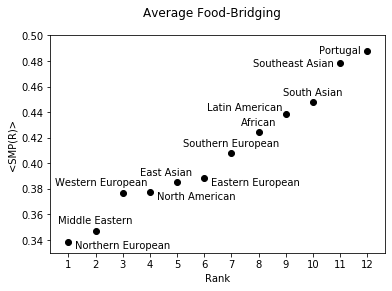

In [48]:
sorted_regions_world_by_avg_food_bridging_by_index = sorted(regions_objects_world_by_index,key=lambda x: x.avg_food_bridging)
fig,axs = plt.subplots()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylim([0.33, 0.5])
for i in range(12):
    axs.scatter(i+1,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging,c='black')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Northern European'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+3,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging-.005],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Middle Eastern'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+1,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging+.006],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Western European'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+0.2,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging+.006],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'North American'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+2.7,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging-.006],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'East Asian'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+0.6,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging+.005],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Eastern European'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+2.9,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging-.006],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Southern European' or sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'African' or sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'South Asian'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i+1,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging+.005],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Latin American'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i-0.5,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging+.003],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Southeast Asian'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i-0.7,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging-.002],ha='center')
    if(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region == 'Portugal'):
        axs.annotate(sorted_regions_world_by_avg_food_bridging_by_index[i].name_region,[i,sorted_regions_world_by_avg_food_bridging_by_index[i].avg_food_bridging-.002],ha='center')
        
axs.set_xlabel('Rank')
axs.set_ylabel('<SMP(R)>')
fig.suptitle('Average Food-Bridging')
#fig.savefig('average_food_bridging_world',dpi=300)

## Calular média food-pairing, média food-bridging e média de ingredientes para cada região

In [67]:
class Region:
    def __init__(self,name_region,avg_food_pairing, std_food_pairing,avg_food_bridging,std_food_bridging):
        self.name_region = name_region
        self.avg_food_pairing = avg_food_pairing
        self.std_food_pairing = std_food_pairing
        self.avg_food_bridging = avg_food_bridging
        self.std_food_bridging = std_food_bridging
    
    def __repr__(self):
        return "Name: %s, avg_food_pairing: %s, std_food_pairing: %s, avg_food_bridging: %s, std_food_bridging: %s" % (self.name_region, self.avg_food_pairing,self.std_food_pairing,self.avg_food_bridging,self.std_food_bridging)


#Açores (AÇOR)
#portuguese_dataset_valid_recipes_df[:24]
values_food_pairing_AÇOR = []
values_food_bridging_AÇOR = []
num_ing_per_recipe_AÇOR = []

#Alentejo (ALEN)
#portuguese_dataset_valid_recipes_df[24:89]
values_food_pairing_ALEN = []
values_food_bridging_ALEN = []
num_ing_per_recipe_ALEN = []

#Algarve (ALGA)
#portuguese_dataset_valid_recipes_df[89:164]
values_food_pairing_ALGA = []
values_food_bridging_ALGA = []
num_ing_per_recipe_ALGA = []


#Beira-Alta (BALT)
#portuguese_dataset_valid_recipes_df[164:195]
values_food_pairing_BALT = []
values_food_bridging_BALT = []
num_ing_per_recipe_BALT = []

#Beira-Baixa (BBAI)
#portuguese_dataset_valid_recipes_df[195:219]
values_food_pairing_BBAI = []
values_food_bridging_BBAI = []
num_ing_per_recipe_BBAI = []


#Beira-Litoral (BLIT)
#portuguese_dataset_valid_recipes_df[219:249]
values_food_pairing_BLIT = []
values_food_bridging_BLIT = []
num_ing_per_recipe_BLIT = []


#Entre Douro e Minho (EDMI)
#portuguese_dataset_valid_recipes_df[249:313]
values_food_pairing_EDMI = []
values_food_bridging_EDMI = []
num_ing_per_recipe_EDMI = []

#Estremadura (ESTR)
#portuguese_dataset_valid_recipes_df[313:385]
values_food_pairing_ESTR = []
values_food_bridging_ESTR = []
num_ing_per_recipe_ESTR = []

#Madeira (MADE)
#portuguese_dataset_valid_recipes_df[385:419]
values_food_pairing_MADE = []
values_food_bridging_MADE = []
num_ing_per_recipe_MADE = []

#Ribatejo (RIBA)
#portuguese_dataset_valid_recipes_df[419:447]
values_food_pairing_RIBA = []
values_food_bridging_RIBA = []
num_ing_per_recipe_RIBA = []

#Trás-os-Montes e Alto Douro (TMAD)
#portuguese_dataset_valid_recipes_df[447:]
values_food_pairing_TMAD = []
values_food_bridging_TMAD = []
num_ing_per_recipe_TMAD = []


avg_food_pairing_by_index = []
avg_food_bridging_by_index = [] 
avg_number_ing_per_recipe_by_index = []
std_food_pairing_by_index = []
std_food_bridging_by_index = []
regions_objects_by_index = []


with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    for i,recipe in portuguese_dataset_valid_recipes_df.iterrows():
        if(i < 24):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_AÇOR.append(food_pairing(matrix))
            values_food_bridging_AÇOR.append(food_bridging(matrix)[0])
            num_ing_per_recipe_AÇOR.append(num_ing)
        if (i >= 24 and i < 89):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_ALEN.append(food_pairing(matrix))
            values_food_bridging_ALEN.append(food_bridging(matrix)[0])
            num_ing_per_recipe_ALEN.append(num_ing)
        if(i >= 89 and i < 164):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_ALGA.append(food_pairing(matrix))
            values_food_bridging_ALGA.append(food_bridging(matrix)[0])
            num_ing_per_recipe_ALGA.append(num_ing)
        if(i >= 164 and i < 195):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_BALT.append(food_pairing(matrix))
            values_food_bridging_BALT.append(food_bridging(matrix)[0])
            num_ing_per_recipe_BALT.append(num_ing)
        if(i >= 195 and i < 219):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_BBAI.append(food_pairing(matrix))
            values_food_bridging_BBAI.append(food_bridging(matrix)[0])
            num_ing_per_recipe_BBAI.append(num_ing)
        if(i >= 219 and i < 249):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_BLIT.append(food_pairing(matrix))
            values_food_bridging_BLIT.append(food_bridging(matrix)[0])
            num_ing_per_recipe_BLIT.append(num_ing)
        if(i >= 249 and i < 313):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_EDMI.append(food_pairing(matrix))
            values_food_bridging_EDMI.append(food_bridging(matrix)[0])
            num_ing_per_recipe_EDMI.append(num_ing)
        if(i >= 313 and i < 385):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_ESTR.append(food_pairing(matrix))
            values_food_bridging_ESTR.append(food_bridging(matrix)[0])
            num_ing_per_recipe_ESTR.append(num_ing)
        if(i >= 385 and i < 419):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_MADE.append(food_pairing(matrix))
            values_food_bridging_MADE.append(food_bridging(matrix)[0])
            num_ing_per_recipe_MADE.append(num_ing)
        if(i >= 419 and i < 447):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_RIBA.append(food_pairing(matrix))
            values_food_bridging_RIBA.append(food_bridging(matrix)[0])
            num_ing_per_recipe_RIBA.append(num_ing)
        if(i >= 447):
            matrix, num_ing,x,y = gerar_matriz_shared_ing(recipe['CODE'])
            values_food_pairing_TMAD.append(food_pairing(matrix))
            values_food_bridging_TMAD.append(food_bridging(matrix)[0])
            num_ing_per_recipe_TMAD.append(num_ing)
            
#Açores (AÇOR)         
avg_food_pairing_AÇOR = statistics.mean(values_food_pairing_AÇOR)
avg_food_bridging_AÇOR = statistics.mean(values_food_bridging_AÇOR)
avg_number_ing_per_recipe_AÇOR = statistics.mean(num_ing_per_recipe_AÇOR)
avg_food_pairing_by_index.append(avg_food_pairing_AÇOR)
avg_food_bridging_by_index.append(avg_food_bridging_AÇOR)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_AÇOR)
values_food_pairing_np_AÇOR = np.array(values_food_pairing_AÇOR)
std_food_pairing_AÇOR = np.std(values_food_pairing_np_AÇOR)
values_food_bridging_np_AÇOR = np.array(values_food_bridging_AÇOR)
std_food_bridging_AÇOR = np.std(values_food_bridging_np_AÇOR)
acor = Region('AÇOR',avg_food_pairing_AÇOR,std_food_pairing_AÇOR,avg_food_bridging_AÇOR,std_food_bridging_AÇOR)
regions_objects_by_index.append(acor)


#Alentejo (ALEN)
avg_food_pairing_ALEN = statistics.mean(values_food_pairing_ALEN)
avg_food_bridging_ALEN = statistics.mean(values_food_bridging_ALEN)
avg_number_ing_per_recipe_ALEN = statistics.mean(num_ing_per_recipe_ALEN)
avg_food_pairing_by_index.append(avg_food_pairing_ALEN)
avg_food_bridging_by_index.append(avg_food_bridging_ALEN)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_ALEN)
values_food_pairing_np_ALEN = np.array(values_food_pairing_ALEN)
std_food_pairing_ALEN = np.std(values_food_pairing_np_ALEN)
values_food_bridging_np_ALEN = np.array(values_food_bridging_ALEN)
std_food_bridging_ALEN = np.std(values_food_bridging_np_ALEN)
alen = Region('ALEN',avg_food_pairing_ALEN,std_food_pairing_ALEN,avg_food_bridging_ALEN,std_food_bridging_ALEN)
regions_objects_by_index.append(alen)



#Algarve (ALGA)
avg_food_pairing_ALGA = statistics.mean(values_food_pairing_ALGA)
avg_food_bridging_ALGA = statistics.mean(values_food_bridging_ALGA)
avg_number_ing_per_recipe_ALGA = statistics.mean(num_ing_per_recipe_ALGA)
avg_food_pairing_by_index.append(avg_food_pairing_ALGA)
avg_food_bridging_by_index.append(avg_food_bridging_ALGA)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_ALGA)
values_food_pairing_np_ALGA = np.array(values_food_pairing_ALGA)
std_food_pairing_ALGA = np.std(values_food_pairing_np_ALGA)
values_food_bridging_np_ALGA = np.array(values_food_bridging_ALGA)
std_food_bridging_ALGA = np.std(values_food_bridging_np_ALGA)
alga = Region('ALGA',avg_food_pairing_ALGA,std_food_pairing_ALGA,avg_food_bridging_ALGA,std_food_bridging_ALGA)
regions_objects_by_index.append(alga)



#Beira-Alta (BALT)
avg_food_pairing_BALT = statistics.mean(values_food_pairing_BALT)
avg_food_bridging_BALT = statistics.mean(values_food_bridging_BALT)
avg_number_ing_per_recipe_BALT = statistics.mean(num_ing_per_recipe_BALT)
avg_food_pairing_by_index.append(avg_food_pairing_BALT)
avg_food_bridging_by_index.append(avg_food_bridging_BALT)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_BALT)
values_food_pairing_np_BALT = np.array(values_food_pairing_BALT)
std_food_pairing_BALT = np.std(values_food_pairing_np_BALT)
values_food_bridging_np_BALT = np.array(values_food_bridging_BALT)
std_food_bridging_BALT = np.std(values_food_bridging_np_BALT)
balt = Region('BALT',avg_food_pairing_BALT,std_food_pairing_BALT,avg_food_bridging_BALT,std_food_bridging_BALT)
regions_objects_by_index.append(balt)


#Beira-Baixa (BBAI)
avg_food_pairing_BBAI = statistics.mean(values_food_pairing_BBAI)
avg_food_bridging_BBAI = statistics.mean(values_food_bridging_BBAI)
avg_number_ing_per_recipe_BBAI = statistics.mean(num_ing_per_recipe_BBAI)
avg_food_pairing_by_index.append(avg_food_pairing_BBAI)
avg_food_bridging_by_index.append(avg_food_bridging_BBAI)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_BBAI)
values_food_pairing_np_BBAI = np.array(values_food_pairing_BBAI)
std_food_pairing_BBAI = np.std(values_food_pairing_np_BBAI)
values_food_bridging_np_BBAI = np.array(values_food_bridging_BBAI)
std_food_bridging_BBAI = np.std(values_food_bridging_np_BBAI)
bbai = Region('BBAI',avg_food_pairing_BBAI,std_food_pairing_BBAI,avg_food_bridging_BBAI,std_food_bridging_BBAI)
regions_objects_by_index.append(bbai)



#Beira-Litoral (BLIT)
avg_food_pairing_BLIT = statistics.mean(values_food_pairing_BLIT)
avg_food_bridging_BLIT = statistics.mean(values_food_bridging_BLIT)
avg_number_ing_per_recipe_BLIT = statistics.mean(num_ing_per_recipe_BLIT)
avg_food_pairing_by_index.append(avg_food_pairing_BLIT)
avg_food_bridging_by_index.append(avg_food_bridging_BLIT)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_BLIT)
values_food_pairing_np_BLIT = np.array(values_food_pairing_BLIT)
std_food_pairing_BLIT = np.std(values_food_pairing_np_BLIT)
values_food_bridging_np_BLIT = np.array(values_food_bridging_BLIT)
std_food_bridging_BLIT = np.std(values_food_bridging_np_BLIT)
blit = Region('BLIT',avg_food_pairing_BLIT,std_food_pairing_BLIT,avg_food_bridging_BLIT,std_food_bridging_BLIT)
regions_objects_by_index.append(blit)



#Entre Douro e Minho (EDMI)
avg_food_pairing_EDMI = statistics.mean(values_food_pairing_EDMI)
avg_food_bridging_EDMI = statistics.mean(values_food_bridging_EDMI)
avg_number_ing_per_recipe_EDMI = statistics.mean(num_ing_per_recipe_EDMI)
avg_food_pairing_by_index.append(avg_food_pairing_EDMI)
avg_food_bridging_by_index.append(avg_food_bridging_EDMI)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_EDMI)
values_food_pairing_np_EDMI = np.array(values_food_pairing_EDMI)
std_food_pairing_EDMI = np.std(values_food_pairing_np_EDMI)
values_food_bridging_np_EDMI = np.array(values_food_bridging_EDMI)
std_food_bridging_EDMI = np.std(values_food_bridging_np_EDMI)
edmi = Region('EDMI',avg_food_pairing_EDMI,std_food_pairing_EDMI,avg_food_bridging_EDMI,std_food_bridging_EDMI)
regions_objects_by_index.append(edmi)


#Estremadura (ESTR)
avg_food_pairing_ESTR = statistics.mean(values_food_pairing_ESTR)
avg_food_bridging_ESTR = statistics.mean(values_food_bridging_ESTR)
avg_number_ing_per_recipe_ESTR = statistics.mean(num_ing_per_recipe_ESTR)
avg_food_pairing_by_index.append(avg_food_pairing_ESTR)
avg_food_bridging_by_index.append(avg_food_bridging_ESTR)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_ESTR)
values_food_pairing_np_ESTR = np.array(values_food_pairing_ESTR)
std_food_pairing_ESTR = np.std(values_food_pairing_np_ESTR)
values_food_bridging_np_ESTR = np.array(values_food_bridging_ESTR)
std_food_bridging_ESTR = np.std(values_food_bridging_np_ESTR)
estr = Region('ESTR',avg_food_pairing_ESTR,std_food_pairing_ESTR,avg_food_bridging_ESTR,std_food_bridging_ESTR)
regions_objects_by_index.append(estr)



#Madeira (MADE)
avg_food_pairing_MADE = statistics.mean(values_food_pairing_MADE)
avg_food_bridging_MADE = statistics.mean(values_food_bridging_MADE)
avg_number_ing_per_recipe_MADE = statistics.mean(num_ing_per_recipe_MADE)
avg_food_pairing_by_index.append(avg_food_pairing_MADE)
avg_food_bridging_by_index.append(avg_food_bridging_MADE)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_MADE)
values_food_pairing_np_MADE = np.array(values_food_pairing_MADE)
std_food_pairing_MADE = np.std(values_food_pairing_np_MADE)
values_food_bridging_np_MADE = np.array(values_food_bridging_MADE)
std_food_bridging_MADE = np.std(values_food_bridging_np_MADE)
made = Region('MADE',avg_food_pairing_MADE,std_food_pairing_MADE,avg_food_bridging_MADE,std_food_bridging_MADE)
regions_objects_by_index.append(made)


#Ribatejo (RIBA)
avg_food_pairing_RIBA = statistics.mean(values_food_pairing_RIBA)
avg_food_bridging_RIBA = statistics.mean(values_food_bridging_RIBA)
avg_number_ing_per_recipe_RIBA = statistics.mean(num_ing_per_recipe_RIBA)
avg_food_pairing_by_index.append(avg_food_pairing_RIBA)
avg_food_bridging_by_index.append(avg_food_bridging_RIBA)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_RIBA)
values_food_pairing_np_RIBA = np.array(values_food_pairing_RIBA)
std_food_pairing_RIBA = np.std(values_food_pairing_np_RIBA)
values_food_bridging_np_RIBA = np.array(values_food_bridging_RIBA)
std_food_bridging_RIBA = np.std(values_food_bridging_np_RIBA)
riba = Region('RIBA',avg_food_pairing_RIBA,std_food_pairing_RIBA,avg_food_bridging_RIBA,std_food_bridging_RIBA)
regions_objects_by_index.append(riba)



#Trás-os-Montes e Alto Douro (TMAD)
avg_food_pairing_TMAD = statistics.mean(values_food_pairing_TMAD)
avg_food_bridging_TMAD = statistics.mean(values_food_bridging_TMAD)
avg_number_ing_per_recipe_TMAD = statistics.mean(num_ing_per_recipe_TMAD)
avg_food_pairing_by_index.append(avg_food_pairing_TMAD)
avg_food_bridging_by_index.append(avg_food_bridging_TMAD)
avg_number_ing_per_recipe_by_index.append(avg_number_ing_per_recipe_TMAD)
values_food_pairing_np_TMAD = np.array(values_food_pairing_TMAD)
std_food_pairing_TMAD = np.std(values_food_pairing_np_TMAD)
values_food_bridging_np_TMAD = np.array(values_food_bridging_TMAD)
std_food_bridging_TMAD = np.std(values_food_bridging_np_TMAD)
tmad = Region('TMAD',avg_food_pairing_TMAD,std_food_pairing_TMAD,avg_food_bridging_TMAD,std_food_bridging_TMAD)
regions_objects_by_index.append(tmad)



#name_regions = ['Açores','Alentejo','Algarve','Beira-Alta','Beira-Baixa','Beira-Litoral','Entre Douro e Minho','Estremadura','Madeira','Ribatejo','Trás-os-Montes e Alto Douro']
name_regions = ['AÇOR','ALEN','ALGA','BALT','BBAI','BLIT','EDMI','ESTR','MADE','RIBA','TMAD']
            
            
print("Average food-pairing: ",avg_food_pairing_by_index)
print("Average food-bridging: ",avg_food_bridging_by_index)
print("Average number of ingredients: ",avg_number_ing_per_recipe_by_index)


Average food-pairing:  [12.844348801652794, 9.430625378536043, 11.072983517917597, 9.886286168253141, 11.640829680082632, 9.588185244239574, 10.596059858190468, 13.406137353062132, 9.710499517184864, 10.62595120988114, 12.718389664581684]
Average food-bridging:  [0.4904547534467904, 0.49562352895024236, 0.5409146117578151, 0.4271295723494055, 0.4047420375769653, 0.4397960406014288, 0.5210775354160352, 0.5107191339727196, 0.5098139719372355, 0.4684994323726542, 0.42240205367705913]
Average number of ingredients:  [8.25, 7.6461538461538465, 8.573333333333334, 6.838709677419355, 7.291666666666667, 8.3, 7.8125, 8.708333333333334, 8.588235294117647, 6.5, 6.770833333333333]


## Figuras (Comparar as 11 regiões de Portugal)

### Food-Pairing versus Food-Bridging

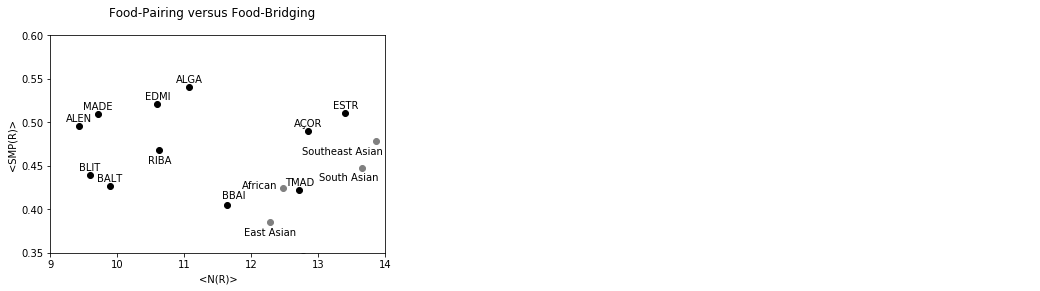

In [132]:
fig, axs = plt.subplots()
plt.xlim([9, 14])
plt.ylim([0.35, 0.60])
for i in range(11):
    axs.scatter(avg_food_pairing_world[i],avg_food_bridging_world[i],c='grey')
    if(labels_countries[i] == 'North American'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]-0.010],ha='center')
    elif(labels_countries[i] == 'Southern European'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]+0.010],ha='center')
    elif(labels_countries[i] == 'Western European'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i]-2.3,avg_food_bridging_world[i]-0.005],ha='center')
    elif(labels_countries[i] == 'Middle Eastern'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i]-2.3,avg_food_bridging_world[i]-0.005],ha='center')
    elif(labels_countries[i] == 'East Asian'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]-0.015],ha='center')
    elif(labels_countries[i] == 'African'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i]-0.35,avg_food_bridging_world[i]],ha='center')
    elif(labels_countries[i] == 'South Asian'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i]-0.2,avg_food_bridging_world[i]-0.015],ha='center')
    elif(labels_countries[i] == 'Southeast Asian'):
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i]-0.5,avg_food_bridging_world[i]-0.015],ha='center')
        
        
    else:
        axs.annotate(labels_countries[i],[avg_food_pairing_world[i],avg_food_bridging_world[i]+0.005],ha='center')
    
for i in range(11):
    axs.scatter(avg_food_pairing_by_index[i],avg_food_bridging_by_index[i],c='black')
    if(name_regions[i] == 'RIBA'):
        axs.annotate(name_regions[i],[avg_food_pairing_by_index[i],avg_food_bridging_by_index[i]-.016],ha='center')
    elif(name_regions[i] == 'BBAI'):
        axs.annotate(name_regions[i],[avg_food_pairing_by_index[i]+0.1,avg_food_bridging_by_index[i]+.008],ha='center')
    else:
        axs.annotate(name_regions[i],[avg_food_pairing_by_index[i],avg_food_bridging_by_index[i]+.005],ha='center')
    
    


axs.set_xlabel('<N(R)>')
axs.set_ylabel('<SMP(R)>')
ynew = 0.475
#axs.axhline(ynew, ls = 'dotted', color = 'black')
xnew = 11.5
#axs.axvline(xnew, ls = 'dotted', color = 'black')
fig.suptitle('Food-Pairing versus Food-Bridging')


#fig, axs = plt.subplots()
#plt.xlim([9, 14])
#plt.ylim([0.35, 0.60])
#for i in range(11):
#    axs.scatter(avg_food_pairing_by_index[i],avg_food_bridging_by_index[i],c='black')
#    if(name_regions[i] == 'RIBA'):
#        axs.annotate(name_regions[i],[avg_food_pairing_by_index[i],avg_food_bridging_by_index[i]-.016],ha='center')
#    elif(name_regions[i] == 'BBAI'):
#        axs.annotate(name_regions[i],[avg_food_pairing_by_index[i]+0.1,avg_food_bridging_by_index[i]+.005],ha='center')
#    else:
#        axs.annotate(name_regions[i],[avg_food_pairing_by_index[i],avg_food_bridging_by_index[i]+.005],ha='center')

    
    
#axs.set_xlabel('<N(R)>')
#axs.set_ylabel('<SMP(R)>')
#ynew = 0.475
#axs.axhline(ynew, ls = 'dotted', color = 'black')
#xnew = 11.5
#axs.axvline(xnew, ls = 'dotted', color = 'black')
#fig.suptitle('Food-Pairing versus Food-Bridging')
fig.savefig('food_pairing_vs_food_bridging_provinces_abstract',dpi=300)

### Figura Average Food-Pairing x Average Number of Ingredients

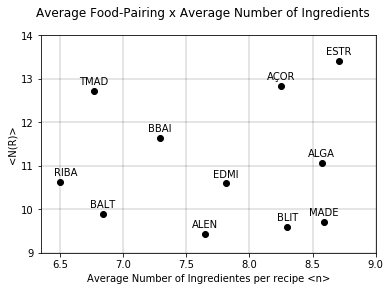

In [87]:
fig,axs = plt.subplots()
plt.xlim([6.35, 9])
plt.ylim([9, 14])
for i in range(11):
    axs.scatter(avg_number_ing_per_recipe_by_index[i],avg_food_pairing_by_index[i],c='black')
    if(name_regions[i] == 'RIBA'):
        axs.annotate(name_regions[i],[avg_number_ing_per_recipe_by_index[i]+0.05,avg_food_pairing_by_index[i]+.15],ha='center')
    else:
        axs.annotate(name_regions[i],[avg_number_ing_per_recipe_by_index[i],avg_food_pairing_by_index[i]+.15],ha='center')
    
axs.set_xlabel('Average Number of Ingredientes per recipe <n>')
axs.set_ylabel('<N(R)>')
plt.grid(color = 'black',linewidth=0.2)
fig.suptitle('Average Food-Pairing x Average Number of Ingredients')
#fig.savefig('food_pairing_vs_number_ingredients_provinces',dpi=300)

### Average Food-Bridging x Average Number of Ingredients

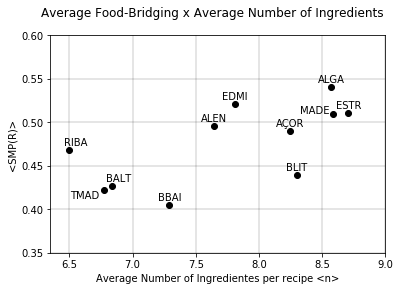

In [84]:
fig,axs = plt.subplots()
plt.xlim([6.35, 9])
plt.ylim([0.35, 0.60])
for i in range(11):
    axs.scatter(avg_number_ing_per_recipe_by_index[i],avg_food_bridging_by_index[i],c='black')
    if(name_regions[i] == 'RIBA' or name_regions[i] == 'BALT'):
        axs.annotate(name_regions[i],[avg_number_ing_per_recipe_by_index[i]+0.05,avg_food_bridging_by_index[i]+.005],ha='center')
    elif(name_regions[i] == 'TMAD'):
        axs.annotate(name_regions[i],[avg_number_ing_per_recipe_by_index[i]-0.15,avg_food_bridging_by_index[i]-.010],ha='center')
    elif(name_regions[i] == 'MADE'):
        axs.annotate(name_regions[i],[avg_number_ing_per_recipe_by_index[i]-0.15,avg_food_bridging_by_index[i]],ha='center')
    else:
        axs.annotate(name_regions[i],[avg_number_ing_per_recipe_by_index[i],avg_food_bridging_by_index[i]+.005],ha='center')
    
axs.set_xlabel('Average Number of Ingredientes per recipe <n>')
axs.set_ylabel('<SMP(R)>')
plt.grid(color = 'black',linewidth=0.2)
fig.suptitle('Average Food-Bridging x Average Number of Ingredients')
#fig.savefig('food_bridging_vs_number_ingredients_provinces',dpi=300)

### Average Food-Pairing

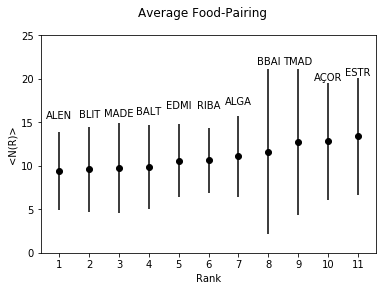

In [89]:
sorted_regions_by_avg_food_pairing_by_index = sorted(regions_objects_by_index, key=lambda x: x.avg_food_pairing)

fig,axs = plt.subplots()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylim([0, 25])
for i in range(11):
    axs.scatter(i+1,sorted_regions_by_avg_food_pairing_by_index[i].avg_food_pairing,c='black')
    axs.errorbar(i+1,sorted_regions_by_avg_food_pairing_by_index[i].avg_food_pairing,sorted_regions_by_avg_food_pairing_by_index[i].std_food_pairing,c='black')
    if(sorted_regions_by_avg_food_pairing_by_index[i].name_region == 'TMAD'):
        axs.annotate(sorted_regions_by_avg_food_pairing_by_index[i].name_region,[i+1,sorted_regions_by_avg_food_pairing_by_index[i].avg_food_pairing+9],ha='center')
    elif(sorted_regions_by_avg_food_pairing_by_index[i].name_region == 'BBAI'):
        axs.annotate(sorted_regions_by_avg_food_pairing_by_index[i].name_region,[i+1,sorted_regions_by_avg_food_pairing_by_index[i].avg_food_pairing+10],ha='center')
    elif(sorted_regions_by_avg_food_pairing_by_index[i].name_region == 'AÇOR' or sorted_regions_by_avg_food_pairing_by_index[i].name_region == 'ESTR'):
        axs.annotate(sorted_regions_by_avg_food_pairing_by_index[i].name_region,[i+1,sorted_regions_by_avg_food_pairing_by_index[i].avg_food_pairing+7],ha='center')
    else:
        axs.annotate(sorted_regions_by_avg_food_pairing_by_index[i].name_region,[i+1,sorted_regions_by_avg_food_pairing_by_index[i].avg_food_pairing+6],ha='center')
    
axs.set_xlabel('Rank')
axs.set_ylabel('<N(R)>')
fig.suptitle('Average Food-Pairing')
#fig.savefig('food_pairing_vs_rank_provinces',dpi=300)

### Average Food-Bridging

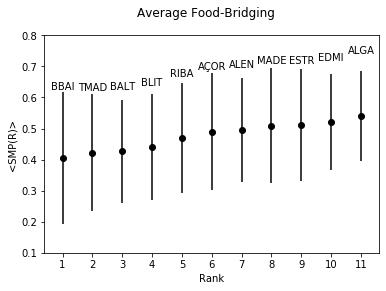

In [91]:
sorted_regions_by_avg_food_bridging_by_index = sorted(regions_objects_by_index, key=lambda x: x.avg_food_bridging)

fig,axs = plt.subplots()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylim([0.1, 0.8])
for i in range(11):
    axs.scatter(i+1,sorted_regions_by_avg_food_bridging_by_index[i].avg_food_bridging,c='black')
    axs.errorbar(i+1,sorted_regions_by_avg_food_bridging_by_index[i].avg_food_bridging,sorted_regions_by_avg_food_bridging_by_index[i].std_food_bridging,c='black')
    if(sorted_regions_by_avg_food_bridging_by_index[i].name_region == 'BBAI'):
         axs.annotate(sorted_regions_by_avg_food_bridging_by_index[i].name_region,[i+1,sorted_regions_by_avg_food_bridging_by_index[i].avg_food_bridging+.22],ha='center')
    else:
        axs.annotate(sorted_regions_by_avg_food_bridging_by_index[i].name_region,[i+1,sorted_regions_by_avg_food_bridging_by_index[i].avg_food_bridging+.20],ha='center')
    
axs.set_xlabel('Rank')
axs.set_ylabel('<SMP(R)>')
fig.suptitle('Average Food-Bridging')
#fig.savefig('food_bridging_vs_rank_provinces',dpi=300)

### Frequência de ingredientes por região

In [ ]:
class Ing:
    def __init__(self,name,frequency):
        self.name = name
        self.frequency = frequency
        
    def __repr__(self):
         return "% s: % s" % (self.name, self.frequency)


def top_10_ings(x,y):
    new_dataframe = portuguese_dataset_valid_recipes_df[x:y].copy()
    ings = []
    
    for i in range(1,422):
        tmp_freq = 0
        for column in new_dataframe.iloc[:,i]:
            if(column == 1):
                tmp_freq += 1
        tmp_freq = (tmp_freq*100/len(new_dataframe))
        tmp_freq = round(tmp_freq,1)
        ings.append(Ing(re.search(r'(?<=\ )(.*?)(?=\()',portuguese_dataset_valid_recipes_df.columns[i]).group().strip(),tmp_freq))
    
    sorted_ings = sorted(ings, key=lambda x: x.frequency, reverse=True)
    return sorted_ings[0:10]

In [ ]:
#name_regions = ['Açores','Alentejo','Algarve','Beira-Alta','Beira-Baixa','Beira-Litoral','Entre Douro e Minho','Estremadura','Madeira','Ribatejo','Trás-os-Montes e Alto Douro']
print("Portugal")
print(top_10_ings(0,495))

print("Açores")
print(top_10_ings(0,24))

print("Alentejo")
print(top_10_ings(24,89))

print("Algarve")
print(top_10_ings(89,164))

print("Beira-Alta")
print(top_10_ings(164,195))

print("Beira-Baixa")
print(top_10_ings(195,219))

print("Beira-Litoral")
print(top_10_ings(219,249))

print("Entre Douro e Minho")
print(top_10_ings(249,313))

print("Estremadura")
print(top_10_ings(313,385))

print("Madeira")
print(top_10_ings(385,419))

print("Ribatejo")
print(top_10_ings(419,447))

print("Trás-os-Montes e Alto Douro")
print(top_10_ings(447,495))

In [ ]:
portugal = [0.02,0.02,0.20,0.00,0.08,0.16,0.56,0.01,0.12,0.01,0.08,3.21,0.01,0.00,0.00]
fig, ax = plt.subplots()
sns.histplot(portugal, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_portugal',dpi=300)

In [ ]:
acor = [0.42,0.00,0.09,0.66,0.54,0.00,0.97,0.30,0.32,0.14,0.10,1.31,0.20,1.08,0.07]
fig, ax = plt.subplots()
sns.histplot(acor, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_acor',dpi=300)

In [ ]:
alen = [0.16,0.00,0.20,0.35,2.00,0.08,0.41,0.10,0.17,0.35,0.52,1.00,0.12,0.01,0.00]
fig, ax = plt.subplots()
sns.histplot(alen, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_alen',dpi=300)

In [ ]:
alga = [0.08,0.20,0.00,0.03,0.02,0.02,0.33,0.03,0.09,0.10,0.00,0.00,0.04,0.03,0.10]
fig, ax = plt.subplots()
sns.histplot(alga, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_alga',dpi=300)

In [ ]:
ba = [0.02,0.03,0.10,0.31,0.01,1.03,0.00,0.01,0.04,2.29,0.02,0.06,0.08,0.43,0.46]
fig, ax = plt.subplots()
sns.histplot(ba, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_balt',dpi=300)

In [ ]:
bb = [0.00,0.10,0.13,0.01,0.01,0.44,0.32,0.00,0.00,0.00,0.00,0.00,0.66,0.11,0.01]
fig, ax = plt.subplots()
sns.histplot(bb, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_bbai',dpi=300)

In [ ]:
bl = [0.02,0.18,0.00,0.05,0.00,0.47,0.45,0.03,0.05,0.10,0.00,0.00,0.00,0.10,0.21]
fig, ax = plt.subplots()
sns.histplot(bl, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_blit',dpi=300)

In [ ]:
edmi = [0.02,0.02,0.56,0.50,0.60,0.33,0.01,0.86,0.01,0.00,0.88,0.65,0.08,1.63,0.92]
fig, ax = plt.subplots()
sns.histplot(edmi, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_edmi',dpi=300)

In [ ]:
est = [0.10,0.00,0.02,0.33,0.58,0.00,0.16,0.19,0.00,0.01,0.04,0.14,0.04,0.01,0.18]
fig, ax = plt.subplots()
sns.histplot(est, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_estr',dpi=300)

In [ ]:
made = [0.08,3.90,1.53,0.88,0.02,3.03,2.70,0.00,1.12,0.89,2.34,0.02,1.12,3.00,0.00]
fig, ax = plt.subplots()
sns.histplot(made, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_made',dpi=300)

In [ ]:
riba = [0.16,0.42,0.01,0.00,0.04,0.05,0.18,0.96,0.03,0.19,0.00,0.00,0.14,0.03,0.27]
fig, ax = plt.subplots()
sns.histplot(riba, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_riba',dpi=300)

In [ ]:
tmad = [0.02,0.07,0.07,0.02,0.05,1.47,0.67,0.25,0.11,0.02,0.01,0.20,0.22,0.25,0.56]
fig, ax = plt.subplots()
sns.histplot(tmad, ax = ax,color="black",stat='count',kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratio")
fig.suptitle('Combination optimization')
plt.show()
fig.savefig('Combination optimization_tmad',dpi=300)